# SyriaTel Customer Churn Analysis

**STUDENT'S DETAILS:**


NAME: Isaac Ndirangu Muturi

MODULE: Full_time

SCHOOL EMAIL: isaac.muturi@student.moringaschool.com

PERSONAL EMAIL: ndirangumuturi749@gmail.com

👉 Twitter: https://twitter.com/NdiranguMuturi1?t=xXF2OKsqOUeb5J_4yysFKg&s=09

👉 LinkedIn: https://www.linkedin.com/in/isaac-muturi-3b6b2b237

👉 GitHub: https://github.com/Isaac-Ndirangu-Muturi-749

TABLE OF CONTENTS

Business Understanding

Data Understanding

Data Preparation

    Explanatory Data Analysis (EDA)

Modeling

Evaluation

Reccomendations

Conclusion

# BUSINESS UNDERSTANDING

As a data scientist assigned to investigate customer churn for SyriaTel, my main objective is to analyze the available data and develop a predictive classifier that can accurately determine whether a customer is likely to terminate their relationship with the telecommunications company. By understanding the underlying patterns and reasons behind customer churn, our aim is to assist SyriaTel in reducing financial losses and implementing targeted retention strategies. Through comprehensive data analysis and modeling techniques, we can identify key factors influencing churn and provide actionable insights to the business.

To achieve this goal, I will begin by conducting a thorough examination of the dataset, encompassing customer demographics, usage patterns, billing information, and customer service interactions. This exploratory analysis will enable me to gain a deep understanding of the data, identifying potential features that have a significant impact on customer churn. By leveraging statistical techniques and visualization methods, I can uncover correlations and patterns that will serve as the foundation for the subsequent modeling phase.

Once the dataset has been carefully examined, I will preprocess the data to handle missing values, encode categorical variables, and normalize numerical features. This preprocessing step is crucial to ensure the dataset is suitable for modeling, as it minimizes bias and enhances the quality of the input data. Additionally, I will employ feature selection techniques to identify the most relevant variables or engineer new features that can provide valuable insights into customer churn. This process will involve assessing feature importance, conducting correlation analysis, and incorporating domain knowledge expertise to select the most informative set of features.

After feature selection and engineering, I will select an appropriate machine learning algorithm for the classification task. Depending on the nature of the data and the problem at hand, algorithms such as logistic regression, decision trees, random forests, support vector machines (SVM), or gradient boosting algorithms like XGBoost or LightGBM may be considered. The chosen algorithm will be trained on the preprocessed dataset, employing suitable training techniques such as cross-validation to ensure the model's robustness and generalization capabilities. By iteratively refining the model's parameters and evaluating its performance, we can develop a reliable classifier for predicting customer churn.

# DATA UNDERSTANDING

## Import libraries and modules

In [38]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.colors as colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from scipy import stats

# Feature Selection, Feature Importance
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.inspection import permutation_importance
from mlxtend.plotting import plot_sequential_feature_selection

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Create a dataframe by reading data from a csv file. Examining the first five rows

In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

## Summary of Features in the Datset

**state**: the state the customer lives in

**account length**: the number of days the customer has had an account

**area code**: the area code of the customer

**phone number**: the phone number of the customer

**international plan**: true if the customer has the international plan, otherwise false

**voice mail plan**: true if the customer has the voice mail plan, otherwise false

**number vmail messages**: the number of voicemails the customer has sent

**total day minutes**: total number of minutes the customer has been in calls during the day

**total day calls**: total number of calls the user has done during the day

**total day charge**: total amount of money the customer was charged by the Telecom company for calls during the day

**total eve minutes**: total number of minutes the customer has been in calls during the evening

**total eve calls**: total number of calls the customer has done during the evening

**total eve charge**: total amount of money the customer was charged by the Telecom company for calls during the evening

**total night minutes**: total number of minutes the customer has been in calls during the night

**total night calls**: total number of calls the customer has done during the night

**total night charge**: total amount of money the customer was charged by the Telecom company for calls during the night

**total intl minutes**: total number of minutes the user has been in international calls

**total intl calls**: total number of international calls the customer has done

**total intl charge**: total amount of money the customer was charged by the Telecom company for international calls

**customer service calls**: number of calls the customer has made to customer service

**churn**: true if the customer terminated their contract, otherwise false

## Check shape of dataframe

In [3]:
df.shape

(3333, 21)

## Concise statistical description of numeric features

In [4]:
df.describe() 

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

## Check for missing values

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

 Our dataset has no missing values.

## Check for duplicated rows

In [6]:
df.duplicated().sum()

0

Our dataset has no duplicated rows to deal with.

## Check the different Data Types for our Dataset

In [8]:
df.select_dtypes('object').columns

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

In [9]:
df.select_dtypes('number').columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')



**Continuous Features:**

account length 

number vmail messages

total day minutes

total day calls

total day charge

total eve minutes

total eve calls

total eve charge

total night minutes

total night calls

total night charge

total intl minutes

total intl charge

customer service calls

**Categorical Features:**

state

area code

international plan

voicemail plan

## Check the number of unique values in all columns

In [12]:
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

# DATA PREPARATION

## Remove customer number feature it is contact information on the client and adds no value to the analysis

In [7]:
df.drop(['phone number'],axis=1,inplace=True)
# Recheck dataframe
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Transforming "Churn" Feature's Rows into 0s and 1s

In [10]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

# Explanatory Data Analysis (EDA)

## Analysis on 'churn' Feature

Churn will be used as the dependent variable in this analysis.

Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account.

**Countplot of churn feature**

0    2850
1     483
Name: churn, dtype: int64


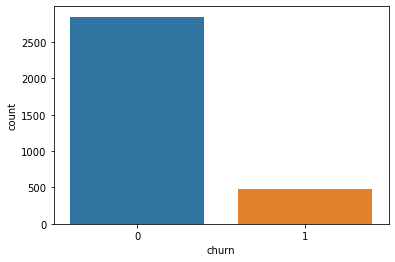

In [13]:
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

483 consumers out of the 3,333 in the sample have discontinued their contract with SyriaTel. That equates to 14.5% of clients lost.

The distribution of binary classes demonstrates a data imbalance. This must be addressed prior to modeling because an unbalanced feature can cause the model to make incorrect predictions.

## Analysis on area code

**Pie chart of area code feature**

In [14]:
area = df['area code'].value_counts()
transuction = area.index
quantity = area.values

# draw pie circule with plotly
figure = px.pie(df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

One-quarter of clients have the area code 510, while the other quarter have the area code 408.

The area code 415 is used by half of the clients.

## Boxplot to see which area code has the highest churn

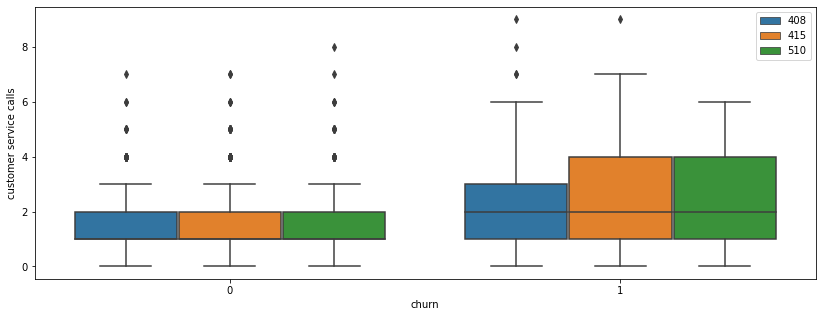

In [15]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

Customers who have not discontinued their accounts include outliers in all area codes.

Customers who have cancelled their accounts are more likely to have a 415 or 510 area code.

 ## Create numeric & categorical lists

In [16]:
numeric_columns = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_columns = ['state','area code','international plan','voice mail plan']

## Here are distrubution plots for some of the numeric features

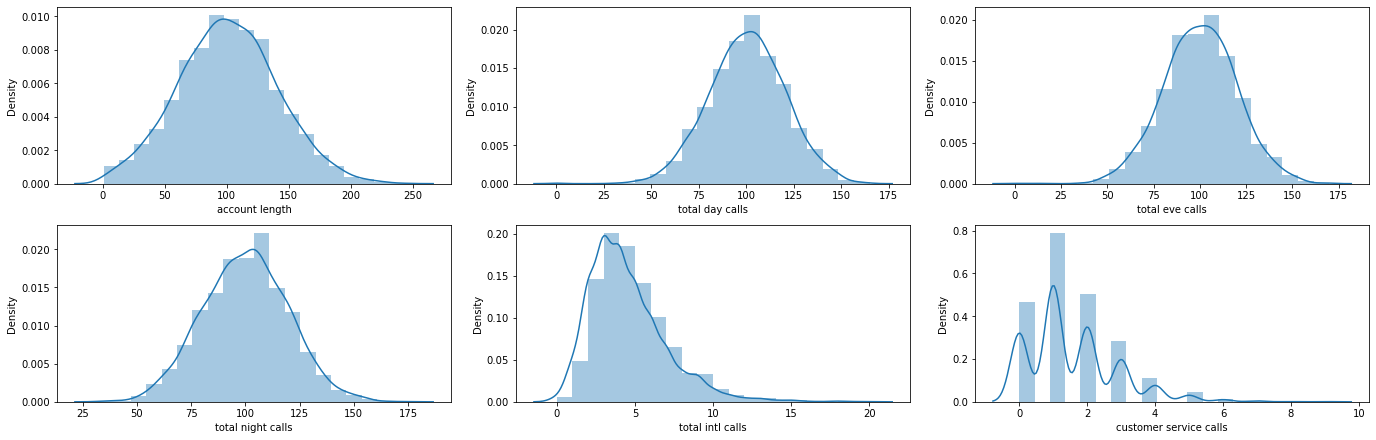

In [17]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

Except for customer service calls, all of the features in the distribution graphs above have a normal distribution. Total foreign calls appear to be skewed to the right, although they are still normally distributed.

Customer service calls have a few peaks, indicating that the population has a few modes. This seems reasonable because customer service calls must be integers, not floats.

## Correlation Heatmap for numeric features

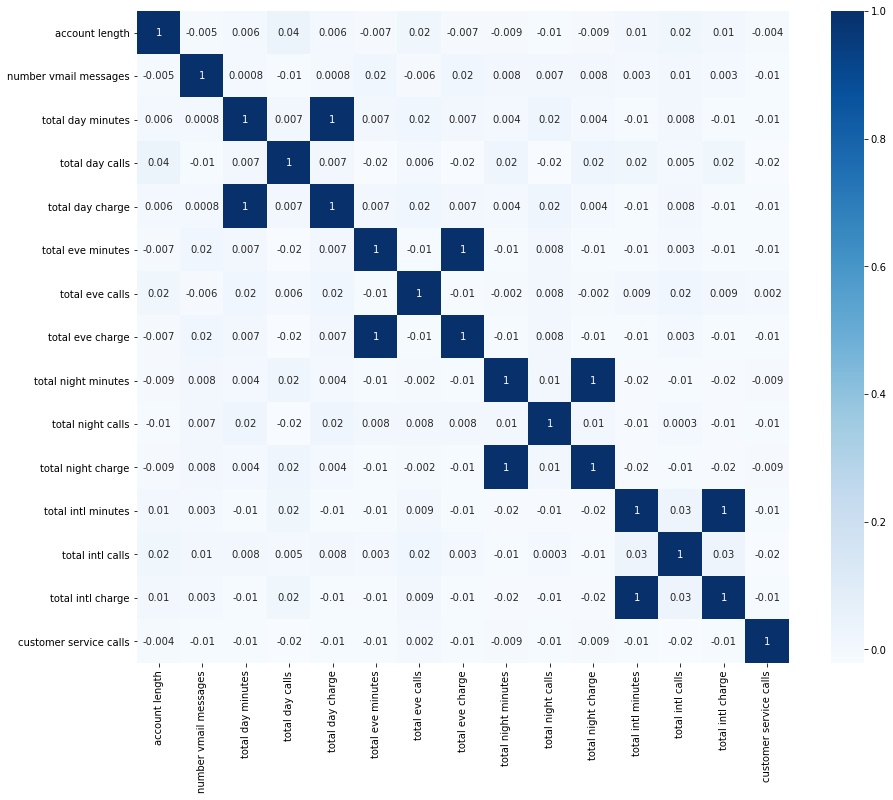

In [18]:
corr_mat = df[numeric_columns].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the features are not correlated.

However, some features in the dataset exhibit perfect positive correlation, such as "Total day charge" and "Total day minutes", "Total eve charge" and "Total eve minutes", "Total night charge" and "Total night minutes", and "Total int charge" and "Total int minutes". 

These features have a correlation coefficient of 1, indicating perfect multicollinearity. In linear models, perfect multicollinearity can cause issues, but its impact on nonlinear models varies. While some nonlinear models may be affected by perfect multicollinearity, others may not be influenced significantly.

**Dropping Highly-Correlated Features**

Dropping features that have a correlation of 0.9 or above.

In [20]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(df.shape[1]))

The original dataframe has 16 columns.
The reduced dataframe has 16 columns.


## Pairplots for Numeric Features (Hue as "Churn")

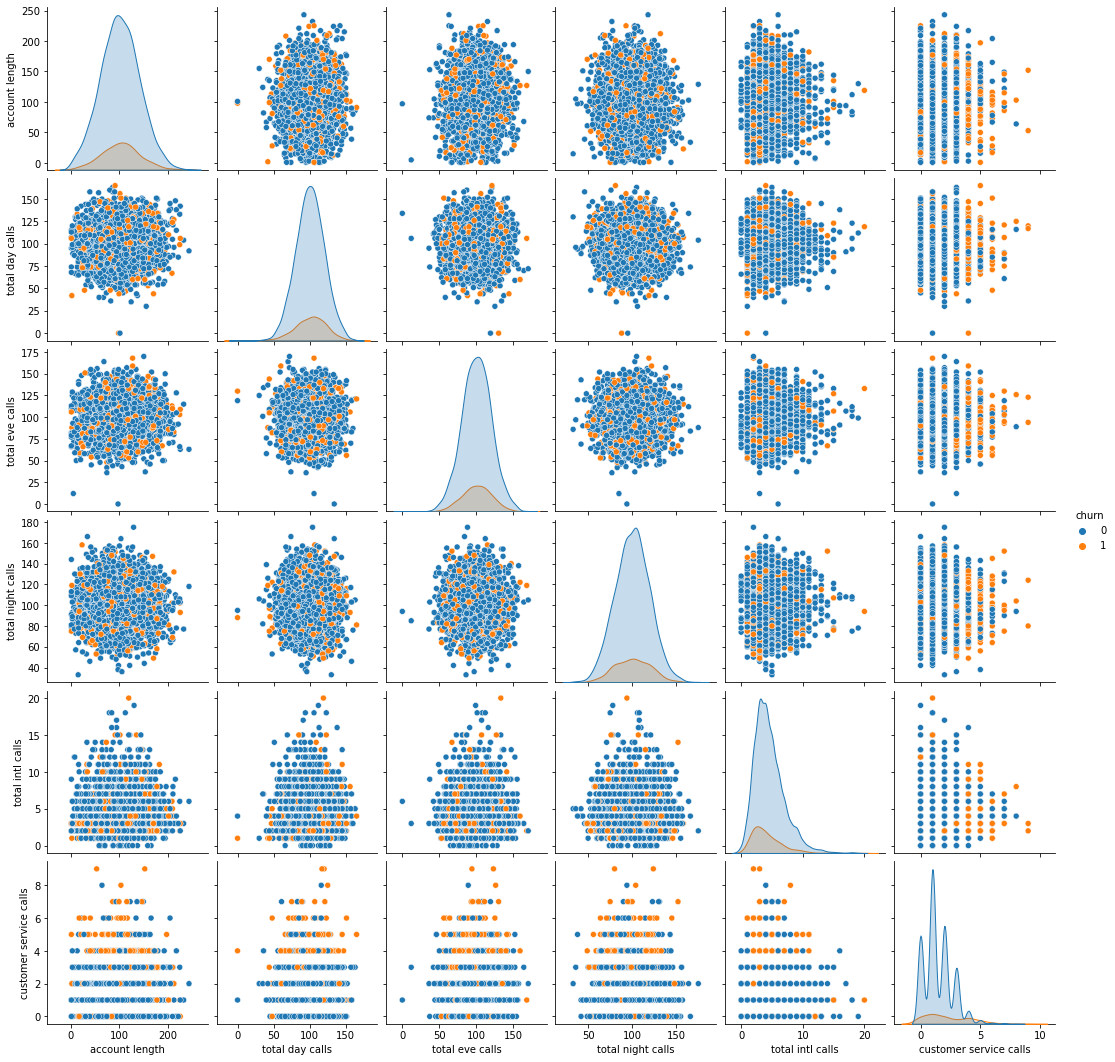

In [21]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

There appears to be a clear link between customer service calls and true churn values. Customers are much more inclined to cancel their service after four calls.

## looking at our target 'churn' distribution for the categorical features

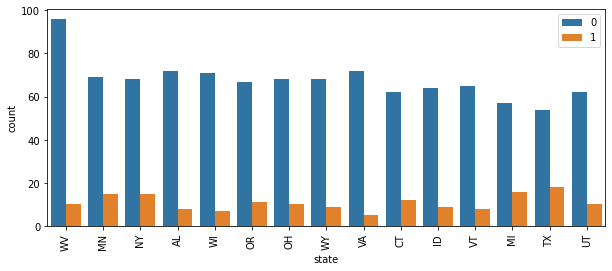

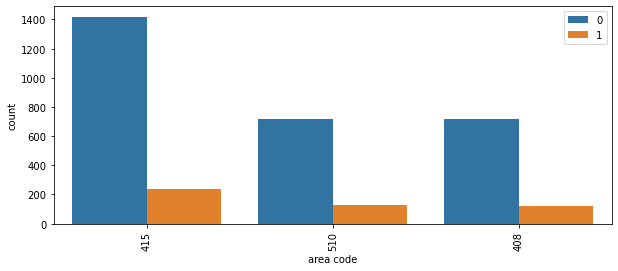

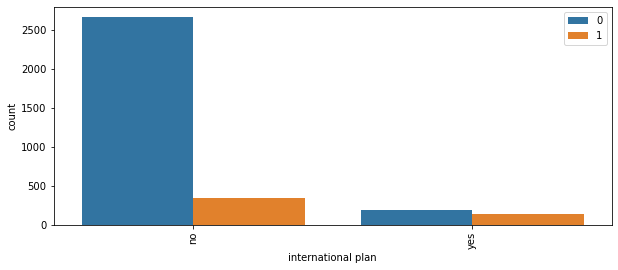

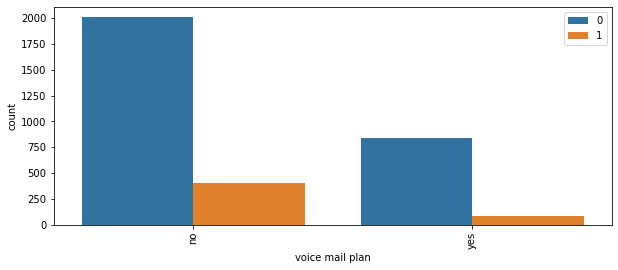

In [23]:
for i in categoric_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

## One-Hot Encoding categorical features

To use in classification models, categorical features are transformed into dummy variables with values of 0 and 1.

In [24]:
# Create dummy variables for the "area code" feature
dummy_df_area_code = pd.get_dummies(df["area code"], dtype=np.int64, prefix="area_code_is")

# Create dummy variables for the "international plan" feature and drop the first column
dummy_df_international_plan = pd.get_dummies(df["international plan"], dtype=np.int64, prefix="international_plan_is", drop_first=True)

# Create dummy variables for the "voice mail plan" feature and drop the first column
dummy_df_voice_mail_plan = pd.get_dummies(df["voice mail plan"], dtype=np.int64, prefix="voice_mail_plan_is", drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_df_area_code, dummy_df_international_plan, dummy_df_voice_mail_plan], axis=1)

# Remove duplicate columns, if any
df = df.loc[:, ~df.columns.duplicated()]

# Drop the original "area code", "international plan", and "voice mail plan" columns
df = df.drop(['area code', 'international plan', 'voice mail plan'], axis=1)

# Display the updated dataframe
df.head()

state  account length  number vmail messages  total day calls  \
0    KS             128                     25              110   
1    OH             107                     26              123   
2    NJ             137                      0              114   
3    OH              84                      0               71   
4    OK              75                      0              113   

   total day charge  total eve calls  total eve charge  total night calls  \
0             45.07               99             16.78                 91   
1             27.47              103             16.62                103   
2             41.38              110             10.30                104   
3             50.90               88              5.26                 89   
4             28.34              122             12.61                121   

   total night charge  total intl calls  total intl charge  \
0               11.01                 3               2.70   
1               11.45                 3               3.70   
2                7.32                 5               3.29   
3                8.86                 7               1.78   
4                8.41                 3               2.73   

   customer service calls  churn  area_code_is_408  area_code_is_415  \
0                       1      0                 0                 1   
1                       1      0                 0                 1   
2                       0      0                 0                 1   
3                       2      0                 1                 0   
4                       3      0                 0                 1   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
3                 0                          1                       0  
4                 0                          1                       0

## label encoding the state categorical feature

The "state" column is transformed using the LabelEncoder technique, which assigns a unique integer to each distinct label in the column. This encoding method is chosen over creating dummy variables due to the large number of distinct values in the "state" column. 

Using dummy variables in this case could potentially introduce issues with the interpretation of feature importance, especially in tree-based models. By applying LabelEncoder, each state label is represented by a corresponding integer, preserving the integrity of the column while avoiding the complications that may arise from using dummy variables.

In [25]:
le = LabelEncoder()
le.fit(df['state'])
df['state'] = le.transform(df['state'])
df.head()

state  account length  number vmail messages  total day calls  \
0     16             128                     25              110   
1     35             107                     26              123   
2     31             137                      0              114   
3     35              84                      0               71   
4     36              75                      0              113   

   total day charge  total eve calls  total eve charge  total night calls  \
0             45.07               99             16.78                 91   
1             27.47              103             16.62                103   
2             41.38              110             10.30                104   
3             50.90               88              5.26                 89   
4             28.34              122             12.61                121   

   total night charge  total intl calls  total intl charge  \
0               11.01                 3               2.70   
1               11.45                 3               3.70   
2                7.32                 5               3.29   
3                8.86                 7               1.78   
4                8.41                 3               2.73   

   customer service calls  churn  area_code_is_408  area_code_is_415  \
0                       1      0                 0                 1   
1                       1      0                 0                 1   
2                       0      0                 0                 1   
3                       2      0                 1                 0   
4                       3      0                 0                 1   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
3                 0                          1                       0  
4                 0                          1                       0

## Interactive Feature Distribution: Churn vs No Churn

The following interactive graph displays the distribution of each feature for customers with churn and those without churn. You can use the slider to switch between different features and observe their respective distributions. This visualization provides insights into how each feature varies for customers based on their churn status.

In [26]:
churn = df[df["churn"] == 1]
no_churn = df[df["churn"] == 0]
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)']  # Churn: blue, No Churn: orange

def create_churn_trace(col, visible=False):
    return go.Histogram(
        x=churn[col],
        name='Churn',
        marker=dict(color=colors[0]),
        visible=visible
    )

def create_no_churn_trace(col, visible=False):
    return go.Histogram(
        x=no_churn[col],
        name='No Churn',
        marker=dict(color=colors[1]),
        visible=visible
    )

features_not_for_hist = ["state", "churn"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]

n_features = len(features_for_hist)
rows = int(n_features / 2) + n_features % 2
cols = 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=features_for_hist)

for i, feature in enumerate(features_for_hist):
    row = (i // cols) + 1
    col = (i % cols) + 1

    fig.add_trace(create_churn_trace(feature, visible=True), row=row, col=col)
    fig.add_trace(create_no_churn_trace(feature, visible=True), row=row, col=col)

    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text="# Samples", row=row, col=col)

    fig.update_layout(
        showlegend=False,
        height=rows * 300,
        width=900,
        title="Feature Distribution: Churn vs No Churn"
    )

fig.show()

"The histogram for the 'international_plan' feature reveals an interesting pattern. The proportion of churn for customers with an international plan is significantly higher compared to those without. This indicates that the presence of an international plan may be a significant factor in customer churn.

Another intriguing observation can be made from the histograms of 'total_day_minutes' and 'total_day_charge'. These two features exhibit similar distributions, indicating a strong correlation. It is notable that customers with higher values for these features are more likely to churn. Interestingly, this trend does not apply to the number of day calls, suggesting that these customers tend to engage in longer conversations rather than making more frequent calls.

In contrast, the distributions of minutes, charges, and number of calls for other times of the day (e.g., evening and night) do not show significant differences between customers with churn and those without churn.

Additionally, the 'total_intl_calls' feature displays an interesting pattern. The data for customers with churn exhibits a more pronounced left skew compared to the data for customers who did not churn. This indicates that the number of international calls may play a role in customer churn, with a higher number of international calls being associated with a higher likelihood of churn."

These observations highlight potential insights into the relationship between various features and customer churn, suggesting areas that may require further investigation or consideration for churn prediction models.

**Next, we take a look at the box plots for each feature. A box plot visualizes the following statistics**

median
the first quartile (Q1) and the third quartile (Q3) building the interquartile range (IQR)
the lower fence (Q1 - 1.5 IQR) and the upper fence (Q3 + 1.5 IQR)
the maximum and the minimum value

## Box Plots for Each Feature

Box plots are used to visualize several statistical measures of a distribution, including:  

Median: The middle value of the dataset.  
First quartile (Q1): The value below which 25% of the data falls.  
Third quartile (Q3): The value below which 75% of the data falls.  
Interquartile Range (IQR): The range between the first and third quartiles.  
Lower Fence: Calculated as Q1 - 1.5 * IQR. Data points below this value are considered outliers.  
Upper Fence: Calculated as Q3 + 1.5 * IQR. Data points above this value are considered outliers.  
Maximum: The highest value in the dataset.  
Minimum: The lowest value in the dataset.  

Box plots provide a visual summary of the distribution of data and help identify potential outliers. By examining the box plots for each feature, we can gain insights into the spread, central tendency, and presence of extreme values in the dataset.  

In [36]:
def create_box_churn_trace(col, visible=False):
    return go.Box(
        y=churn[col],
        name='Churn',
        marker=dict(color=colors[1]),
        visible=visible,
    )

def create_box_no_churn_trace(col, visible=False):
    return go.Box(
        y=no_churn[col],
        name='No Churn',
        marker=dict(color=colors[0]),
        visible=visible,
    )

features_not_for_hist = ["state", "churn"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]

# Remove features with too few distinct values (e.g., binary features) because boxplots may not provide meaningful insights for them
features_for_box = [col for col in features_for_hist if len(churn[col].unique()) > 5]

active_idx = 0
box_traces_churn = [(create_box_churn_trace(col) if i != active_idx else create_box_churn_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_no_churn = [(create_box_no_churn_trace(col) if i != active_idx else create_box_no_churn_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
data = box_traces_churn + box_traces_no_churn

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method='restyle',
        args=['visible', [False] * len(data)],
        label=features_for_box[i],
    )
    step['args'][1][i] = True  # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=active_idx,
    currentvalue=dict(
        prefix="Feature: ",
        xanchor='center',
    ),
    pad={"t": 50},
    steps=steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='Value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')


**The box plot analysis reveals interesting patterns for different features:**

Regarding "number_vmail_messages," churn customers mostly have zero voice mail messages, while non-churn customers tend to have more.

For "total_day_minutes" and "total_day_charge," churn customers show higher median values, indicating higher day-time usage and charges compared to non-churn customers.

In terms of "total_intl_calls," both churn and non-churn customers make similar numbers of international calls, but churn customers tend to have longer call durations.

Analyzing "customer service calls," churn customers have a higher median and greater variance, indicating a higher need for customer service interactions.

These box plots provide valuable insights into the differences between churn and non-churn customers, highlighting distinct usage patterns and communication behaviors.

## Outlier Detection & Treatment

Dropping outliers past 3 standard deviations.

In [37]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  2860


# MODELLING

## Scaling Numerical Features: Min-Max Normalization

Scaling numerical features is a crucial step in data preprocessing, aimed at transforming values of variables into a similar range. This process helps to mitigate the impact of outliers and ensure that variables have consistent scales.

In our data, we apply the Min-Max Normalization method using the MinMaxScaler. This technique scales the variables so that the average value becomes 0 and the variance becomes 1. Additionally, it rescales the variable values to fall within the range of 0 to 1.

By applying the Min-Max Normalization, we address standard deviation issues and achieve a standardized representation of our numerical features. The MinMaxScaler is specifically applied to the columns specified in the "columns_to_be_scaled" variable below.

In [39]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
    
df.head()

state  account length  number vmail messages  total day calls  \
0   0.32        0.587963               0.510204         0.576271   
1   0.70        0.490741               0.530612         0.686441   
2   0.62        0.629630               0.000000         0.610169   
6   0.38        0.555556               0.489796         0.389831   
8   0.36        0.537037               0.000000         0.466102   

   total day charge  total eve calls  total eve charge  total night calls  \
0          0.773956         0.495652          0.490082           0.422414   
1          0.450248         0.530435          0.483858           0.525862   
2          0.706088         0.591304          0.238040           0.534483   
6          0.627184         0.573913          0.989498           0.655172   
8          0.521979         0.330435          1.000000           0.413793   

   total night charge  total intl calls  total intl charge  \
0            0.644118               0.2           0.487585   
1            0.676471               0.2           0.713318   
2            0.372794               0.4           0.620767   
6            0.538235               0.6           0.336343   
8            0.548529               0.3           0.408578   

   customer service calls  churn  area_code_is_408  area_code_is_415  \
0                     0.2    0.0               0.0               1.0   
1                     0.2    0.0               0.0               1.0   
2                     0.0    0.0               0.0               1.0   
6                     0.6    0.0               0.0               0.0   
8                     0.2    0.0               1.0               0.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
6               1.0                        0.0                     1.0  
8               0.0                        0.0                     0.0

## Train-Test Split: Evaluating Model Performance

To evaluate the performance of our machine learning model, it is essential to split the dataset into training and testing sets. In our case, we employ a common practice of splitting the data with a ratio of 75% for training and 25% for testing.

This train-test split allows us to train our model on a substantial portion of the data while reserving a separate portion for evaluation purposes. By training on the training set and testing on the testing set, we can assess how well our model generalizes to unseen data and measure its predictive performance.

Splitting the dataset in this manner ensures that the model is evaluated on independent data and provides a reliable estimate of its performance.

In [40]:
X=df.drop(['churn'],axis=1)
y=df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

## Applying SMOTE Technique to Address Class Imbalance in the 'churn' Feature

Class imbalance is a common challenge in machine learning tasks, where one class (in this case, the 'churn' class) is significantly underrepresented compared to the other class. To overcome this issue and improve the performance of our predictive model, we apply the Synthetic Minority Oversampling Technique (SMOTE).

SMOTE is an oversampling technique specifically designed to address class imbalance. It generates synthetic samples for the minority class by interpolating between existing positive instances. By doing so, SMOTE helps to balance the class distribution and mitigate the overfitting problem that can arise with random oversampling.

The technique focuses on the feature space and intelligently creates new instances that resemble the positive instances in the minority class. This process helps to provide the model with more representative examples, enhancing its ability to learn from and accurately classify both classes.

By applying SMOTE, we aim to improve the predictive performance of our model by addressing the class imbalance issue and ensuring that the minority class is adequately represented in the training data.

**check distribution before applying smote**

In [41]:
df.churn.value_counts()

0.0    2546
1.0     314
Name: churn, dtype: int64

**applying SMOTE**

In [42]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2145, 17)
Before OverSampling, the shape of y_train: (2145,)
After OverSampling, the shape of X_train_over: (3798, 17)
After OverSampling, the shape of y_train_over: (3798,)


**checking for class imbalance again**

In [43]:
y_train_over.value_counts()

0.0    1899
1.0    1899
Name: churn, dtype: int64

# MODEL 1 - Logistic Regression Classifier

Logistic regression is a classification algorithm used when the target variable is categorical. It is commonly applied when the output is binary, where the data points are categorized into one class or another (e.g., 0 or 1).

In our analysis, we will utilize logistic regression as our initial model. This choice serves as a starting point for evaluating the performance of more advanced models. Logistic regression is a well-established and interpretable algorithm, providing a foundation for our analysis and enabling us to compare the effectiveness of more complex techniques against this baseline approach.

## Object creation, fitting the data & getting predictions 

In [46]:
lr_model_vanilla= LogisticRegression()
lr_model_vanilla.fit(X_train_over,y_train_over) 
y_pred_lr_vanilla = lr_model_vanilla.predict(X_test) 

## Classification Report
The classification report provides an evaluation of the performance of the Logistic Regression Classifier in predicting the churn class. It includes metrics such as precision, recall, F1-score, and support for each class ("0" for no churn and "1" for churn). These metrics help assess the model's accuracy, sensitivity, and overall performance in predicting churn.

In [47]:
print(classification_report(y_test, y_pred_lr_vanilla, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       647
           1       0.25      0.78      0.37        68

    accuracy                           0.75       715
   macro avg       0.61      0.76      0.61       715
weighted avg       0.90      0.75      0.80       715



## Logistic Regression Vanilla Classifier Model Results and Confusion Matrix Visualization

 LOGISTIC REGRESSION VANILLA CLASSIFIER MODEL RESULTS
Accuracy:  0.75105
F1 Score:  0.37324
Recall:  0.77941
Precision:  0.24537


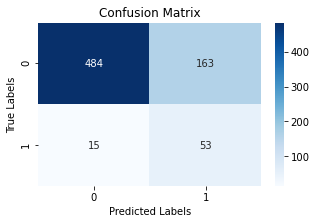

In [49]:
print(" LOGISTIC REGRESSION VANILLA CLASSIFIER MODEL RESULTS")
print('Accuracy: ', round(accuracy_score(y_test, y_pred_lr_vanilla), 5))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr_vanilla), 5))
print('Recall: ', round(recall_score(y_test, y_pred_lr_vanilla), 5))
print('Precision: ', round(precision_score(y_test, y_pred_lr_vanilla), 5))

cm_lr = confusion_matrix(y_test, y_pred_lr_vanilla)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The accuracy of 0.75105 suggests that the model correctly predicted the churn status of approximately 75.11% of the customers.  
The F1 score of 0.37324 represents a balanced evaluation of the model's accuracy in predicting both churn and non-churn customers.  
The recall score of 0.77941 indicates the model's ability to correctly identify churn cases, while the precision score of 0.24537 reflects its ability to minimize false positive predictions.

## Hyperparameter Tuning of Logistic Regression Classifier

Cross validated GridSearchCV hyperparameter tuning technique is used.

**Parameter Grid for Logistic Regression Model Optimization**

In [50]:
lr_params = {'penalty': ['l1', 'l2'], 
             'C': np.logspace(0, 4, 5),
             'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
             'max_iter' : [5, 10]}

**Grid Search for Logistic Regression Model Optimization**

In [ ]:
lr_model2 = LogisticRegression()
lr_cv_model = GridSearchCV(lr_model2, lr_params, cv=3, n_jobs=-1, verbose=False)
lr_cv_model.fit(X_train_over, y_train_over)

print("Best parameters: " + str(lr_cv_model.best_params_))

**Logistic Regression Model with GridSearchCV Applied**

In [55]:
lr_model_GridSearchCV_Applied = LogisticRegression(C=1.0, max_iter=5, penalty='l1', solver='saga')
lr_model_GridSearchCV_Applied.fit(X_train_over, y_train_over)
y_pred_GridSearchCV_Applied = lr_model_GridSearchCV_Applied.predict(X_test)

## Classification Report(Hyperparameter Tuned Logistic Regression Model)

In [54]:
print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       647
           1       0.23      0.76      0.36        68

    accuracy                           0.74       715
   macro avg       0.60      0.75      0.60       715
weighted avg       0.90      0.74      0.79       715



## Hyperparameter Tuned Logistic Regression Model Results and Confusion Matrix Visualization

HYPERPARAMETER TUNED LOGISTIC REGRESSION MODEL RESULTS
Accuracy:  0.73986
F1 score:  0.35862
Recall:  0.76471
Precision:  0.23423


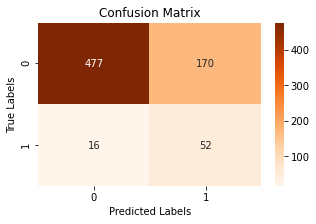

In [53]:
print("HYPERPARAMETER TUNED LOGISTIC REGRESSION MODEL RESULTS")
print('Accuracy: ', round(accuracy_score(y_test, y_pred_GridSearchCV_Applied), 5))
print('F1 score: ', round(f1_score(y_test, y_pred_GridSearchCV_Applied), 5))
print('Recall: ', round(recall_score(y_test, y_pred_GridSearchCV_Applied), 5))
print('Precision: ', round(precision_score(y_test, y_pred_GridSearchCV_Applied), 5))
cm_rf = confusion_matrix(y_test, y_pred_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The hyperparameter-tuned logistic regression model achieved an accuracy of 0.73986 on the testing set. The F1 score, which balances precision and recall, is 0.35862. The recall score, which measures the ability to correctly identify positive cases, is 0.76471. The precision score, which measures the accuracy of positive predictions, is 0.23423.

Overall, the model's performance indicates that it is able to predict the churn class to some extent, but there is room for improvement in terms of precision and F1 score. It correctly identifies a good proportion of churn cases (as indicated by the recall score), but it may also produce some false positive predictions (lower precision score).

## Model Performance Comparison: Logistic Regression Classifiers

The table below compares the performance of two logistic regression classifiers on the test set:

In [56]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Classifier (Default)',
                                          'Logistic Regression Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_pred_lr_vanilla), accuracy_score(y_test,y_pred_GridSearchCV_Applied)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_pred_lr_vanilla), f1_score(y_test,y_pred_GridSearchCV_Applied)],
                                 'Recall (Test Set)':[recall_score(y_test, y_pred_lr_vanilla), recall_score(y_test,y_pred_GridSearchCV_Applied)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_pred_lr_vanilla), precision_score(y_test,y_pred_GridSearchCV_Applied)]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

## Feature Importance Levels - Logistic Regression Classifier

The bar chart below illustrates the importance levels of the top 10 features based on their coefficients in the logistic regression classifier.

The importance levels are determined by the absolute values of the coefficients. Features with higher absolute coefficients are considered more influential in predicting the target variable. The chart provides insights into the relative importance of different features in the classification model.

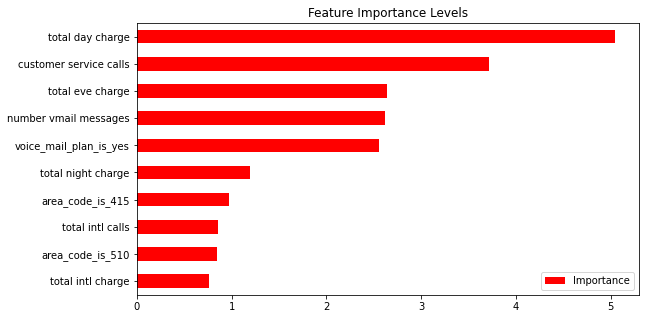

In [58]:
coefficients = lr_model_GridSearchCV_Applied.coef_[0]
importance = pd.DataFrame({"Importance": abs(coefficients)}, index=X_train_over.columns)
importance.sort_values(by="Importance", axis=0, ascending=True).tail(10).plot(kind="barh", color="r", figsize=(9, 5))
plt.title("Feature Importance Levels")
plt.show()

# MODEL 2 - Random Forest Classifier

Random Forest is an ensemble learning algorithm used for classification tasks. It combines predictions from multiple decision trees to improve accuracy and generalization. Each decision tree is trained on a random subset of the data and features, reducing overfitting.

During prediction, each tree independently predicts the class label, and the final prediction is based on majority voting. This approach reduces biases and errors compared to a single decision tree.

Random Forest also provides feature importance measures by calculating the average impact of each feature across the trees. This helps identify influential features and gain insights into the data's patterns and relationships.

## Object creation, fitting the data & getting predictions 

In [59]:
rf_model_vanilla = RandomForestClassifier() 
rf_model_vanilla.fit(X_train_over,y_train_over) 
y_pred_rf_vanilla = rf_model_vanilla.predict(X_test)

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred_rf_vanilla, target_names=['0', '1']))

## Random Forest Vanilla Classifier Model Results and Confusion Matrix Visualization

RANDOM FOREST VANILLA CLASIFIER MODEL RESULTS
Accuracy:  0.94965
F1 score:  0.72727
Recall:  0.70588
Precision:  0.75


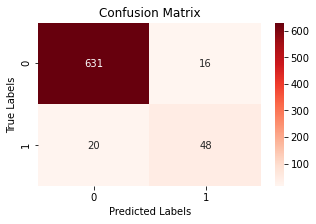

In [60]:
print("RANDOM FOREST VANILLA CLASIFIER MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test,y_pred_rf_vanilla),5))
print('F1 score: ',round(f1_score(y_test,y_pred_rf_vanilla),5))
print('Recall: ',round(recall_score(y_test,y_pred_rf_vanilla),5))
print('Precision: ',round(precision_score(y_test,y_pred_rf_vanilla),5))
cm_rf = confusion_matrix(y_test, y_pred_rf_vanilla)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The Random Forest Vanilla Classifier achieved a high accuracy of 94.965%. It shows a balanced F1 score of 0.72727, indicating a good trade-off between precision and recall. The model has a recall of 0.70588, capturing a significant portion of churn cases, and a precision of 0.75, correctly identifying churn customers 75% of the time. These results indicate the model's effectiveness in predicting customer churn, but further optimization may be required.

## Hyperparameter Tuning of Random Forest Classifier

Cross validated GridSearchCV hyperparameter tuning technique is used.

**Parameter Grid for Random Forest Model Optimization**

In [62]:
rf_params = {"max_depth": [8,15,20],
             "n_estimators":[500,1000],
             "min_samples_split":[5,10,15],
             "min_samples_leaf" : [1, 2, 4],
             "max_features": ['auto', 'sqrt'],
             "criterion":['entropy','gini']}

**Grid Search for Random Forest Model Optimization**

In [ ]:
rf_model2 = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model2, rf_params, cv=3, n_jobs=-1, verbose=False)
rf_cv_model.fit(X_train_over,y_train_over)
print("Best parameters:"+str(rf_cv_model.best_params_))

**Random Forest Model with GridSearchCV Applied**

In [61]:
rf_model_GridSearchCV_Applied = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
rf_model_GridSearchCV_Applied.fit(X_train_over,y_train_over)
y_pred_rf_GridSearchCV_Applied = rf_model_GridSearchCV_Applied.predict(X_test)

## Classification Report(Hyperparameter Tuned Random Forest Model)

In [64]:
print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       647
           1       0.22      0.78      0.35        68

    accuracy                           0.72       715
   macro avg       0.60      0.75      0.58       715
weighted avg       0.90      0.72      0.78       715



## Hyperparameter Tuned Random Forest Model Results and Confusion Matrix Visualization

HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS
Accuracy:  0.94685
F1 score:  0.72059
Recall:  0.72059
Precision:  0.72059


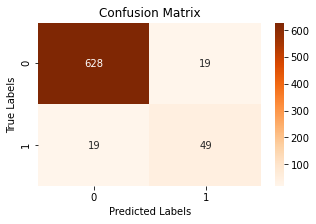

In [63]:
print("HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test, y_pred_rf_GridSearchCV_Applied),5))
print('F1 score: ',round(f1_score(y_test, y_pred_rf_GridSearchCV_Applied),5))
print('Recall: ',round(recall_score(y_test, y_pred_rf_GridSearchCV_Applied),5))
print('Precision: ',round(precision_score(y_test, y_pred_rf_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_rf_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The Hyperparameter Tuned Random Forest Model achieved a high accuracy of 94.685%. It shows a balanced F1 score of 0.72059, indicating a good balance between precision and recall. The model has a recall of 0.72059, meaning it effectively captures a significant portion of churn cases. The precision of 0.72059 indicates that the model correctly identifies churn customers 72.059% of the time. These results suggest that the hyperparameter tuning has improved the model's performance and its ability to predict customer churn accurately.

## Model Performance Comparison: Random Forest Classifiers

In [65]:
comparison_frame = pd.DataFrame({'Model':['Random Forest Classifier (Default)',
                                          'Random Forest Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_pred_rf_vanilla), accuracy_score(y_test,y_pred_rf_GridSearchCV_Applied)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_pred_rf_vanilla), f1_score(y_test,y_pred_rf_GridSearchCV_Applied)],
                                 'Recall (Test Set)':[recall_score(y_test, y_pred_rf_vanilla), recall_score(y_test,y_pred_rf_GridSearchCV_Applied)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_pred_rf_vanilla), precision_score(y_test,y_pred_rf_GridSearchCV_Applied)]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

## Feature Importance Analysis
The chart below shows the top 10 features and their importance levels determined by the hyperparameter tuned Random Forest model. The importance values indicate the relative significance of each feature in predicting the target variable.

Analyzing feature importance helps identify the most influential factors in the model's decision-making process. This information guides feature selection and highlights areas for further investigation or model improvement.

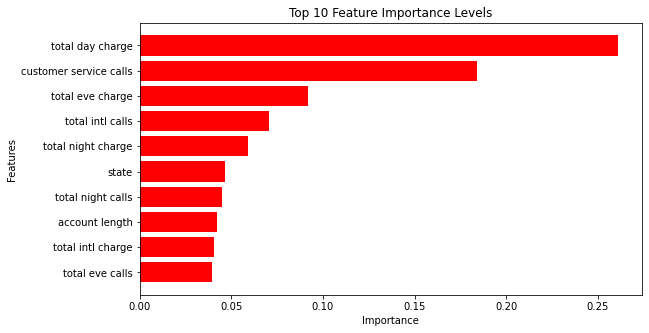

In [67]:
importance = pd.DataFrame({"Importance": rf_model_GridSearchCV_Applied.feature_importances_}, index=X_train_over.columns)
importance = importance.sort_values(by="Importance", ascending=True).tail(10)

plt.figure(figsize=(9, 5))
plt.barh(importance.index, importance["Importance"], color="red")
plt.title("Top 10 Feature Importance Levels")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# MODEL 3 - Decision Tree Classifier

The Decision Tree Classifier is a supervised learning technique used for both classification and regression problems. It is particularly well-suited for solving classification problems. The algorithm constructs a tree-like structure, where each internal node represents a feature of the dataset, branches represent decision rules, and each leaf node represents an outcome.

The decision tree algorithm mimics human thinking by sequentially making decisions based on the features of the data. It starts with a root node and recursively expands on branches to create a tree-like structure.

One of the key advantages of decision trees is their interpretability. The tree structure makes it easy to understand the logic behind the decisions made by the model.

By using a decision tree classifier, we can gain insights into the important features and the decision-making process, making it a valuable tool in various domains.

## Object creation, fitting the data & getting predictions 

In [68]:
dt_model_vanilla = DecisionTreeClassifier()
dt_model_vanilla.fit(X_train_over,y_train_over)
y_pred_dt_vanilla = dt_model_vanilla.predict(X_test)

## Classification Report

In [69]:
print(classification_report(y_test, y_pred_dt_vanilla, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       647
           1       0.43      0.65      0.51        68

    accuracy                           0.88       715
   macro avg       0.69      0.78      0.72       715
weighted avg       0.91      0.88      0.89       715



## Decision Tree Vanilla Classifier Model Results and Confusion Matrix Visualization

DECISION TREE VANILLA CLASSIFIER MODEL RESULTS
Accuracy:  0.88392
F1 score:  0.51462
Recall:  0.64706
Precision:  0.42718


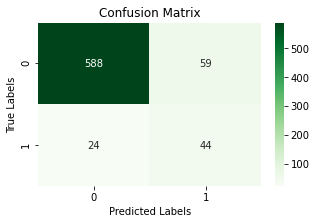

In [70]:
print("DECISION TREE VANILLA CLASSIFIER MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test,y_pred_dt_vanilla),5))
print('F1 score: ',round(f1_score(y_test,y_pred_dt_vanilla),5))
print('Recall: ',round(recall_score(y_test,y_pred_dt_vanilla),5))
print('Precision: ',round(precision_score(y_test,y_pred_dt_vanilla),5))
cm_dt = confusion_matrix(y_test, y_pred_dt_vanilla)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The Decision Tree Vanilla Classifier achieved an accuracy of 0.88392 on the test set, with a moderate F1 score of 0.51462. The model showed a recall of 0.64706, indicating room for improvement in capturing positive instances. The precision score was 0.42718, reflecting the proportion of correctly predicted positives. There is potential to enhance the model's performance by fine-tuning and exploring advanced techniques.

## Hyperparameter Tuning of Decision Tree Classifier

**Parameter Grid for Decision Tree Model Optimization**

In [71]:
dt_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt"], # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19)
    'min_samples_split': [6, 10, 14]
}

**Grid Search for Decision Tree Model Optimization**

In [72]:
dt_model2 = DecisionTreeClassifier()
dt_cv_model = GridSearchCV(dt_model2, dt_params, cv=3, n_jobs=-1, verbose=False)
dt_cv_model.fit(X_train_over,y_train_over)
print("Best parameters:"+str(dt_cv_model.best_params_))

Best parameters:{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6}


**Decision Tree Model with GridSearchCV Applied**

In [73]:
dt_model_GridSearchCV_Applied = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=5, min_samples_split=14)
dt_model_GridSearchCV_Applied.fit(X_train_over,y_train_over)
y_pred_dt_GridSearchCV_Applied = dt_model_GridSearchCV_Applied.predict(X_test)

## Classification Report(Hyperparameter Tuned Decision Tree Model)

In [74]:
print(classification_report(y_test, y_pred_dt_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       647
           1       0.39      0.60      0.48        68

    accuracy                           0.87       715
   macro avg       0.68      0.75      0.70       715
weighted avg       0.90      0.87      0.89       715



## Hyperparameter Tuned Decision Tree Model Results and Confusion Matrix Visualization

HYPERPARAMETER TUNED DECISION TREE MODEL RESULTS
Accuracy:  0.87413
F1 score:  0.47674
Recall:  0.60294
Precision:  0.39423


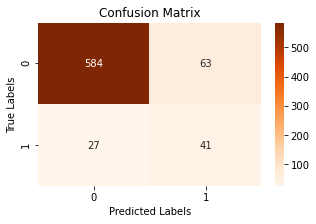

In [75]:
print("HYPERPARAMETER TUNED DECISION TREE MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test, y_pred_dt_GridSearchCV_Applied),5))
print('F1 score: ',round(f1_score(y_test, y_pred_dt_GridSearchCV_Applied),5))
print('Recall: ',round(recall_score(y_test, y_pred_dt_GridSearchCV_Applied),5))
print('Precision: ',round(precision_score(y_test, y_pred_dt_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_dt_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The Hyperparameter Tuned Decision Tree model achieved an accuracy of 0.87413 on the test set. However, the F1 score was relatively lower at 0.47674, indicating a trade-off between precision and recall. The model had a recall of 0.60294, suggesting that it correctly identified a moderate number of positive instances. The precision score was 0.39423, reflecting the model's ability to correctly classify positive instances. Further optimization and exploration of advanced techniques may be necessary to improve the model's overall performance.

## Model Performance Comparison: Decision Tree Classifiers

In [76]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree Classifier (Default)',
                                          'Decision Tree Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_pred_dt_vanilla), accuracy_score(y_test,y_pred_dt_GridSearchCV_Applied)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_pred_dt_vanilla), f1_score(y_test,y_pred_dt_GridSearchCV_Applied)],
                                 'Recall (Test Set)':[recall_score(y_test, y_pred_dt_vanilla), recall_score(y_test,y_pred_dt_GridSearchCV_Applied)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_pred_dt_vanilla), precision_score(y_test,y_pred_dt_GridSearchCV_Applied)]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

## Top 10 Feature Importance Levels for Decision Tree Model

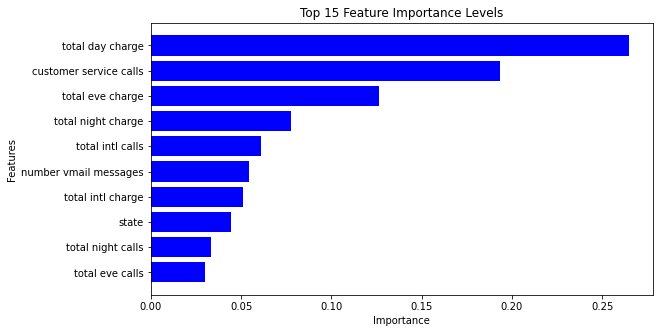

In [80]:
importance = pd.DataFrame({"Importance": dt_model_GridSearchCV_Applied.feature_importances_}, index=X_train_over.columns)
importance = importance.sort_values(by="Importance", ascending=True).tail(10)

plt.figure(figsize=(9, 5))
plt.barh(importance.index, importance["Importance"], color="b")
plt.title("Top 15 Feature Importance Levels")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# MODEL 4 - K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. In the context of customer churn prediction for SyriaTel, KNN can be utilized to classify customers as churned or active based on similarities in their feature values.

In KNN modeling, the algorithm classifies a new data point by comparing it to its K nearest neighbors in the training dataset. The value of K represents the number of neighboring data points considered for classification. The algorithm calculates the distance between the new data point and each of its neighbors using a distance metric such as Euclidean distance. The majority class among the K nearest neighbors determines the class label assigned to the new data point.

One advantage of KNN is its simplicity and intuitive nature. It does not make any underlying assumptions about the data distribution and can capture nonlinear relationships between features and the target variable. 

The choice of K is crucial, as too low or too high values can lead to biased or noisy predictions, respectively. Additionally, KNN is sensitive to the scale of features, and feature normalization may be necessary to ensure equal importance across different variables.

## Object creation, fitting the data & getting predictions 

In [81]:
knn_model_vanilla = KNeighborsClassifier()
knn_model_vanilla.fit(X_train_over,y_train_over)
y_pred_knn_vanilla = knn_model_vanilla.predict(X_test)

## Classification Report

In [82]:
print(classification_report(y_test, y_pred_knn_vanilla, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       647
           1       0.24      0.69      0.36        68

    accuracy                           0.76       715
   macro avg       0.60      0.73      0.61       715
weighted avg       0.89      0.76      0.81       715



## K-Nearest Neighbors (KNN) Classifier Model Results and Confusion Matrix Visualization

K-Nearest Neighbors (KNN) VANILLA CLASSIFIER MODEL RESULTS
Accuracy:  0.76364
F1 score:  0.35741
Recall:  0.69118
Precision:  0.24103


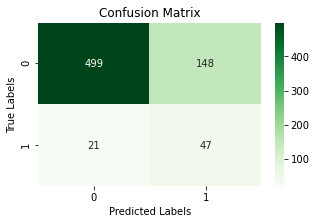

In [83]:
print("K-Nearest Neighbors (KNN) VANILLA CLASSIFIER MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test,y_pred_knn_vanilla),5))
print('F1 score: ',round(f1_score(y_test,y_pred_knn_vanilla),5))
print('Recall: ',round(recall_score(y_test,y_pred_knn_vanilla),5))
print('Precision: ',round(precision_score(y_test,y_pred_knn_vanilla),5))
cm_dt = confusion_matrix(y_test, y_pred_knn_vanilla)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The K-Nearest Neighbors (KNN) vanilla classifier model achieved an accuracy of 0.76364 on the test set. The F1 score, which measures the balance between precision and recall, is 0.35741. The recall score, representing the ability to correctly identify positive instances, is 0.69118. The precision score, indicating the proportion of correctly identified positive instances, is 0.24103.

These scores suggest that the KNN model has moderate performance in classification tasks. While the accuracy is relatively high, indicating overall correctness in predictions, the F1 score is low, indicating an imbalance between precision and recall. The recall score suggests that the model can successfully identify a considerable portion of positive instances, but the precision score indicates that there is a relatively high rate of false positives.

Therefore, it is important to consider the specific requirements and priorities of the classification problem when assessing the effectiveness of the KNN model. Further analysis and potential improvements may be necessary to achieve a more balanced and accurate performance.

## Hyperparameter Tuning of K-Nearest Neighbors (KNN) Classifier

**Parameter Grid for K-Nearest Neighbors (KNN) Model Optimization**

In [84]:
knn_params = {'weights' : ['uniform', 'distance'],
              'metric' : ['manhattan', 'euclidean', 'minkowski'],
              'n_neighbors': [5, 15, 25, 35, 45, 55, 65],
              'p': [1, 2, 10]}

**Grid Search for K-Nearest Neighbors (KNN) Model Optimization**

In [85]:
knn_model2 = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn_model2, knn_params, cv=3, n_jobs=-1, verbose=False)
knn_cv_model.fit(X_train_over, y_train_over)
print("Best parameters: " + str(knn_cv_model.best_params_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


**K-Nearest Neighbors (KNN) Model with GridSearchCV Applied**

In [86]:
knn_model_GridSearchCV_Applied = KNeighborsClassifier(metric='manhattan', n_neighbors=5, p=1, weights='distance')
knn_model_GridSearchCV_Applied.fit(X_train_over, y_train_over)
y_pred_knn_GridSearchCV_Applied = knn_model_GridSearchCV_Applied.predict(X_test)

## Classification Report(Hyperparameter Tuned K-Nearest Neighbors (KNN) Model)

In [87]:
print(classification_report(y_test, y_pred_knn_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86       647
           1       0.25      0.69      0.37        68

    accuracy                           0.78       715
   macro avg       0.61      0.74      0.62       715
weighted avg       0.89      0.78      0.82       715



## Hyperparameter Tuned K-Nearest Neighbors (KNN) Model Results and Confusion Matrix Visualization

HYPERPARAMETER TUNED K-Nearest Neighbors (KNN) MODEL RESULTS
Accuracy:  0.77762
F1 score:  0.37154
Recall:  0.69118
Precision:  0.25405


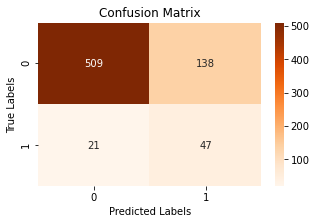

In [88]:
print("HYPERPARAMETER TUNED K-Nearest Neighbors (KNN) MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test, y_pred_knn_GridSearchCV_Applied),5))
print('F1 score: ',round(f1_score(y_test, y_pred_knn_GridSearchCV_Applied),5))
print('Recall: ',round(recall_score(y_test, y_pred_knn_GridSearchCV_Applied),5))
print('Precision: ',round(precision_score(y_test, y_pred_knn_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_knn_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The hyperparameter-tuned K-Nearest Neighbors (KNN) model achieved an accuracy of 0.77762 on the test set. The F1 score, which balances precision and recall, is 0.37154. The recall score, representing the model's ability to correctly identify positive instances, is 0.69118. The precision score, indicating the proportion of correctly identified positive instances, is 0.25405.

Compared to the vanilla KNN model, the hyperparameter-tuned model shows slight improvements in accuracy and F1 score. However, the performance is still similar in terms of recall and precision. The model maintains a relatively high recall score, suggesting that it can successfully identify a considerable portion of positive instances. However, the precision score remains relatively low, indicating a higher rate of false positives.

## Model Performance Comparison: K-Nearest Neighbors (KNN) Classifiers

In [89]:
comparison_frame = pd.DataFrame({'Model':['knn Classifier (Default)',
                                          'knn Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_pred_knn_vanilla), accuracy_score(y_test,y_pred_knn_GridSearchCV_Applied)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_pred_knn_vanilla), f1_score(y_test,y_pred_knn_GridSearchCV_Applied)],
                                 'Recall (Test Set)':[recall_score(y_test, y_pred_knn_vanilla), recall_score(y_test,y_pred_knn_GridSearchCV_Applied)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_pred_knn_vanilla), precision_score(y_test,y_pred_knn_GridSearchCV_Applied)]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

## Permutation Importance for K-Nearest Neighbors (KNN) Model

The plot above displays the top 10 feature importance levels obtained using the permutation importance method for the K-Nearest Neighbors (KNN) model. Permutation importance is a technique that assesses the importance of each feature by randomly permuting its values and measuring the impact on the model's performance.

The higher the permutation importance score, the more influential the feature is in the model's predictions. The importance scores are represented on the horizontal axis, and the corresponding features are shown on the vertical axis.

In this plot, features with higher permutation importance are positioned towards the right, indicating their greater impact on the model's performance. The color of the bars is set to purple for better visibility. By analyzing the feature importance levels, we can identify the key features that contribute significantly to the KNN model's predictive power.

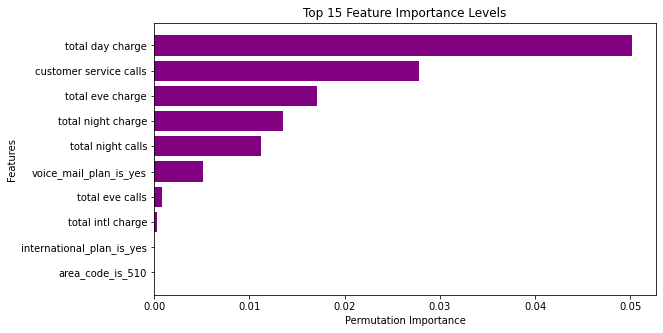

In [93]:
importance = pd.DataFrame({"Importance": result.importances_mean}, index=X_train_over.columns)
importance = importance.sort_values(by="Importance").tail(10)

plt.figure(figsize=(9, 5))
plt.barh(importance.index, importance["Importance"], color="purple")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Top 15 Feature Importance Levels")
plt.show() # Plotting feature importance using permutation importance

# MODEL 5 - Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that separates data points with the largest margin, allowing it to handle high-dimensional and nonlinear data effectively. 

SVM utilizes support vectors, which are the data points closest to the decision boundary, to define the separation between classes. It can handle both linearly separable and nonlinear data using different kernel functions such as linear, polynomial, RBF, and sigmoid.

One advantage of SVM is its ability to generalize well to unseen data and handle complex datasets. By maximizing the margin, SVM can provide good generalization performance and be less prone to overfitting. SVM is also robust against outliers due to its focus on support vectors. 

## Object creation, fitting the data & getting predictions 

In [94]:
svm_model_vanilla = SVC(probability=True)
svm_model_vanilla.fit(X_train_over,y_train_over)
y_pred_svm_vanilla = svm_model_vanilla.predict(X_test)

## Classification Report

In [95]:
print(classification_report(y_test, y_pred_svm_vanilla, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       647
           1       0.40      0.76      0.53        68

    accuracy                           0.87       715
   macro avg       0.69      0.82      0.72       715
weighted avg       0.92      0.87      0.89       715



## Support Vector Machine (SVM) Classifier Model Results and Confusion Matrix Visualization

Support Vector Machine (SVM) VANILLA CLASSIFIER MODEL RESULTS
Accuracy:  0.86853
F1 score:  0.52525
Recall:  0.76471
Precision:  0.4


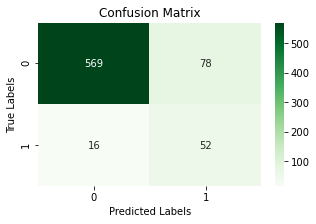

In [96]:
print("Support Vector Machine (SVM) VANILLA CLASSIFIER MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test,y_pred_svm_vanilla),5))
print('F1 score: ',round(f1_score(y_test,y_pred_svm_vanilla),5))
print('Recall: ',round(recall_score(y_test,y_pred_svm_vanilla),5))
print('Precision: ',round(precision_score(y_test,y_pred_svm_vanilla),5))
cm_dt = confusion_matrix(y_test, y_pred_svm_vanilla)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The Support Vector Machine (SVM) vanilla classifier achieved an accuracy of 0.86853 on the test set. The F1 score, which considers both precision and recall, is 0.52525. The recall score, indicating the ability to correctly identify positive instances, is 0.76471, while the precision score, representing the proportion of correctly predicted positive instances, is 0.4.

These results suggest that the SVM model has a decent overall accuracy, but there is room for improvement in terms of precision. The model performs relatively well in identifying positive instances (recall score), but it has a lower precision, meaning it may generate more false positives. Further analysis and potential adjustments to the model parameters could help enhance its performance.

## Hyperparameter Tuning of Support Vector Machine (SVM) Classifier

**Parameter Grid for Support Vector Machine (SVM) Model Optimization**

In [97]:
svm_params = {'gamma': [1, 0.1],
              'kernel': ['linear'],
              'C': [0.1, 1, 10]}

**Grid Search for Support Vector Machine (SVM) Model Optimization**

In [98]:
svm_model2 = SVC(probability=True)
svm_cv_model = GridSearchCV(svm_model2, svm_params, cv=3, n_jobs=-1, verbose=False)
svm_cv_model.fit(X_train_over,y_train_over)
print("Best parameters:"+str(svm_cv_model.best_params_))

Best parameters:{'C': 10, 'gamma': 1, 'kernel': 'linear'}


**Support Vector Machine (SVM) Model with GridSearchCV Applied**

In [99]:
svm_model_GridSearchCV_Applied = SVC(probability=True, C=10, gamma=1, kernel='linear')
svm_model_GridSearchCV_Applied.fit(X_train_over, y_train_over)
y_pred_svm_GridSearchCV_Applied = svm_model_GridSearchCV_Applied.predict(X_test)


## Classification Report(Hyperparameter Tuned Support Vector Machine (SVM) Model)

In [100]:
print(classification_report(y_test, y_pred_svm_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       647
           1       0.25      0.76      0.37        68

    accuracy                           0.75       715
   macro avg       0.61      0.76      0.61       715
weighted avg       0.90      0.75      0.80       715



## Hyperparameter Tuned Support Vector Machine (SVM) Model Results and Confusion Matrix Visualization

HYPERPARAMETER TUNED Support Vector Machine (SVM) MODEL RESULTS
Accuracy:  0.75385
F1 score:  0.37143
Recall:  0.76471
Precision:  0.24528


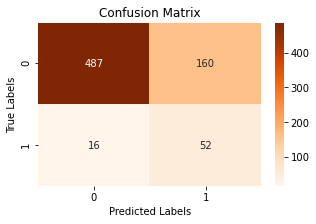

In [101]:
print("HYPERPARAMETER TUNED Support Vector Machine (SVM) MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test, y_pred_svm_GridSearchCV_Applied),5))
print('F1 score: ',round(f1_score(y_test, y_pred_svm_GridSearchCV_Applied),5))
print('Recall: ',round(recall_score(y_test, y_pred_svm_GridSearchCV_Applied),5))
print('Precision: ',round(precision_score(y_test, y_pred_svm_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_svm_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The hyperparameter-tuned Support Vector Machine (SVM) model achieved an accuracy of 0.75385 on the test set. The F1 score, which considers both precision and recall, is 0.37143. The recall score, indicating the ability to correctly identify positive instances, is 0.76471, while the precision score, representing the proportion of correctly predicted positive instances, is 0.24528.

These results suggest that the hyperparameter-tuned SVM model performs similarly to the vanilla classifier in terms of accuracy and recall. However, the precision score is lower, indicating a higher rate of false positives. This suggests that the model may struggle with correctly identifying negative instances.

## Model Performance Comparison: Support Vector Machine (SVM) Classifiers

In [102]:
comparison_frame = pd.DataFrame({'Model':['svm Classifier (Default)',
                                          'svm Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[accuracy_score(y_test,y_pred_svm_vanilla), accuracy_score(y_test,y_pred_svm_GridSearchCV_Applied)],
                                 'F1 Score (Test Set)':[f1_score(y_test, y_pred_svm_vanilla), f1_score(y_test,y_pred_svm_GridSearchCV_Applied)],
                                 'Recall (Test Set)':[recall_score(y_test, y_pred_svm_vanilla), recall_score(y_test,y_pred_svm_GridSearchCV_Applied)], 
                                 'Precision (Test Set)':[precision_score(y_test, y_pred_svm_vanilla), precision_score(y_test,y_pred_svm_GridSearchCV_Applied)]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

## Plotting feature importances for Support Vector Machine (SVM) model

SVM determines the importance of features implicitly by identifying the support vectors and constructing the decision boundary. The importance of features can be inferred based on their contribution to the decision boundary.

If you want to visualize the importance of features in an SVM model, one approach is to examine the magnitude of the coefficients (weights) assigned to each feature. However, this approach is only applicable when using linear kernels

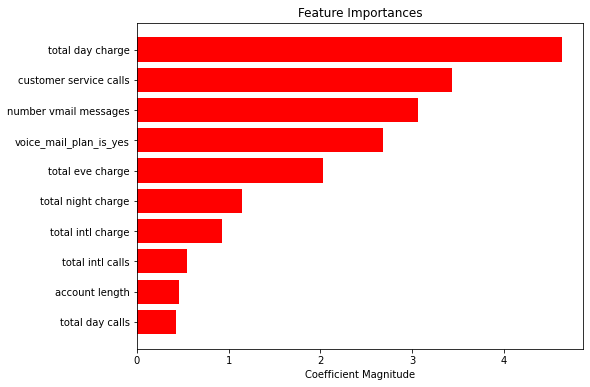

In [104]:
coefficients = svm_model_GridSearchCV_Applied.coef_[0]
importances = np.abs(coefficients)
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [X_train_over.columns[i] for i in indices])
plt.xlabel('Coefficient Magnitude')
plt.show()


# EVALUATION

## Models Comparison

These models have been optimized using hyperparameter tuning techniques to improve their performance. Now, let's evaluate these models and compare their results.

Here are the tuned models used for classification: 

In [106]:
models = [('Logistic Regression (Tuned)', lr_model_GridSearchCV_Applied),
          ('Random Forest (Tuned)', rf_model_GridSearchCV_Applied),
          ('Decision Tree (Tuned)', dt_model_GridSearchCV_Applied),
          ('K-Nearest Neighbors (Tuned)', knn_model_GridSearchCV_Applied),
          ('SVM (Tuned)', svm_model_GridSearchCV_Applied)]

## ROC Curve Analysis and Model Ranking


The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a binary classification model. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings.

The ROC curve is commonly used to evaluate and compare the performance of different classification models. A model with a higher ROC curve that is closer to the top-left corner indicates better predictive accuracy. The area under the ROC curve (AUC) is also calculated, which provides a single value representing the overall performance of the model. A higher AUC indicates better discrimination power.

By analyzing the ROC curve and calculating the AUC for different models, we can assess their ability to correctly classify positive and negative instances and rank them based on their performance.

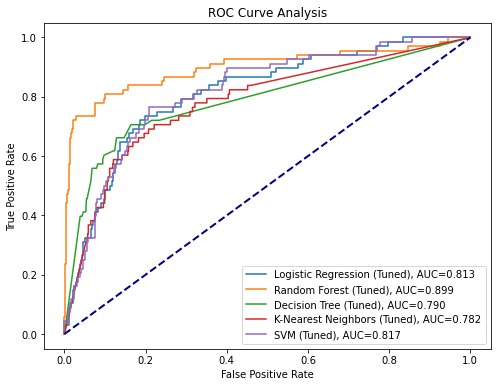

Models sorted by AUC in descending order:

Random Forest (Tuned)
SVM (Tuned)
Logistic Regression (Tuned)
Decision Tree (Tuned)
K-Nearest Neighbors (Tuned)


In [111]:
plt.figure(figsize=(8, 6))
roc_auc_values = []

for model_name, model in models:
    if 'SVM' in model_name:
        decision_values = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, decision_values)
    else:
        y_probas = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probas)

    roc_auc = roc_auc_score(y_test, decision_values if 'SVM' in model_name else y_probas)
    roc_auc_values.append((model_name, roc_auc))
    plt.plot(fpr, tpr, label=f'{model_name}, AUC={roc_auc:.3f}')

# Sort models by AUC in descending order
roc_auc_values.sort(key=lambda x: x[1], reverse=True)

sorted_model_names = [model[0] for model in roc_auc_values]

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend()
plt.show()

print("\033[1mModels sorted by AUC in descending order:\n\033[0m")
for model_name in sorted_model_names:
    print(model_name)

**Model Comparisons - F1 Score (10-fold cross-validated)**

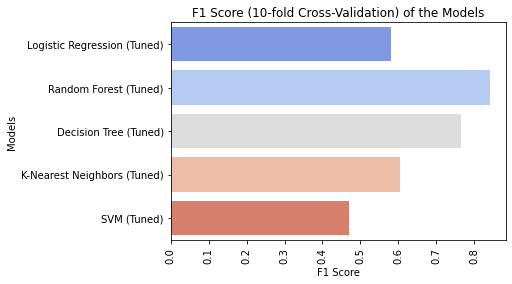

In [115]:
f1_scores = []
results_f1 = pd.DataFrame(columns=["Models", "F1 Score"])

for model_name, model in models:
    f1_scores = cross_val_score(model, X, y, cv=10, scoring='f1_macro')
    result = pd.DataFrame([[model_name, f1_scores.mean()]], columns=["Models", "F1 Score"])
    results_f1 = results_f1.append(result)

sns.barplot(x='F1 Score', y='Models', data=results_f1, palette="coolwarm")
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.title('F1 Score (10-fold Cross-Validation) of the Models')
plt.xticks(rotation=90)
plt.show()

**Model Comparisons - F1 Score Rankings**

In [118]:
results_f1.sort_values(by="F1 Score",ascending=False)

Models  F1 Score
0        Random Forest (Tuned)  0.840960
0        Decision Tree (Tuned)  0.764756
0  K-Nearest Neighbors (Tuned)  0.604378
0  Logistic Regression (Tuned)  0.581800
0                  SVM (Tuned)  0.470958

The table above displays the F1 scores of the tuned models, which are a measure of their overall performance considering both precision and recall. The Random Forest model achieved the highest F1 score of 0.8409, indicating a strong balance between precision and recall. The Decision Tree model followed with an F1 score of 0.7648. The K-Nearest Neighbors model obtained an F1 score of 0.6044, while the Logistic Regression and SVM models had lower F1 scores of 0.5818 and 0.4710, respectively. These scores provide insights into the models' effectiveness in capturing the true positive and negative instances.

## Model Comparisons - Accuracy (10-fold cross-validated)

In this section, we compare the accuracy of different models using 10-fold cross-validation. The bar plot shows the accuracy scores of each model, with warmer colors indicating higher accuracy. This helps us identify the models that perform better in terms of overall accuracy. However, it's important to consider other evaluation metrics and domain-specific requirements when selecting a model.

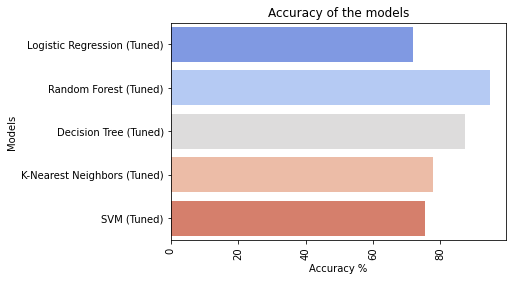

In [116]:
results_acc = pd.DataFrame(columns=["Models", "Accuracy"])

for model_name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[model_name, accuracy * 100]], columns=["Models", "Accuracy"])
    results_acc = results_acc.append(result)

sns.barplot(x='Accuracy', y='Models', data=results_acc, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
plt.xticks(rotation=90)
plt.show()

**Model Comparisons - Accuracy Rankings**

In [117]:
results_acc.sort_values(by="Accuracy",ascending=False)

Models   Accuracy
0        Random Forest (Tuned)  94.685315
0        Decision Tree (Tuned)  87.412587
0  K-Nearest Neighbors (Tuned)  77.762238
0                  SVM (Tuned)  75.384615
0  Logistic Regression (Tuned)  71.888112

The table above ranks the tuned models based on their accuracy performance. The Random Forest model achieved the highest accuracy of 94.68%, followed by the Decision Tree model with 87.41% accuracy. The K-Nearest Neighbors model obtained an accuracy of 77.76%, while the Support Vector Machine (SVM) model achieved 75.38% accuracy. The Logistic Regression model had the lowest accuracy among the tuned models, scoring 71.89%. These rankings provide a comparative overview of the models' accuracy in predicting the target variable..

# selecting model

The Random Forest model is  suitable choice due to its strong performance in terms of accuracy, F1 score, and feature importance. It achieved an accuracy of 94.685% and an F1 score of 0.841, indicating its ability to accurately classify instances and achieve a balance between precision and recall.

One of the key advantages of the Random Forest algorithm is its ability to handle high-dimensional data and capture complex relationships between features. It works by constructing multiple decision trees and combining their predictions, which helps to reduce overfitting and improve generalization on unseen data. This ensemble approach also allows the model to effectively handle outliers, noisy data, and missing values.

Additionally, the feature importance analysis of the Random Forest model revealed the significance of certain features in making accurate predictions. By examining the importance levels of different features, we can gain insights into the underlying patterns and relationships within the dataset. This information can be valuable for feature selection and understanding the factors that drive the target variable.

Overall, the Random Forest model's high accuracy, robustness against overfitting, and ability to capture important features make it a reliable choice for this classification task.

# Applying SFS (Sequential Feature Selector) Feature Selection Technique to our Random Forest model


Sequential Feature Selector (SFS) is a feature selection technique that iteratively selects the most relevant features for a given task. It reduces dimensionality and improves model performance by choosing features based on predefined criteria. SFS explores different feature combinations and evaluates their impact on model performance. It improves interpretability and computational efficiency by selecting informative features.

During each iteration, SFS evaluates different subsets of features by training and testing a machine learning model. It considers both the individual performance of features and their interactions with other selected features. This way, SFS explores different combinations of features to identify the most informative subset.

**check feature columns in our dataset**

In [119]:
df.columns

Index(['state', 'account length', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn',
       'area_code_is_408', 'area_code_is_415', 'area_code_is_510',
       'international_plan_is_yes', 'voice_mail_plan_is_yes'],
      dtype='object')

## Sequential Forward Selection (SFS) for Feature Selection

In [120]:
rf = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
sfs1 = SFS(rf, k_features=10, forward=True, floating=False, verbose=False,scoring='f1',cv=3,n_jobs=-1)
sfs1 = sfs1.fit(X, y)
sfs1.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([0.30857143, 0.27380952, 0.30681818]),
  'avg_score': 0.29639971139971144,
  'feature_names': ('total day charge',)},
 2: {'feature_idx': (4, 11),
  'cv_scores': array([0.5047619, 0.4171123, 0.4953271]),
  'avg_score': 0.4724004356769613,
  'feature_names': ('total day charge', 'customer service calls')},
 3: {'feature_idx': (4, 6, 11),
  'cv_scores': array([0.67368421, 0.62068966, 0.63687151]),
  'avg_score': 0.643748458026206,
  'feature_names': ('total day charge',
   'total eve charge',
   'customer service calls')},
 4: {'feature_idx': (4, 6, 11, 16),
  'cv_scores': array([0.75257732, 0.70967742, 0.76404494]),
  'avg_score': 0.7420998942542307,
  'feature_names': ('total day charge',
   'total eve charge',
   'customer service calls',
   'voice_mail_plan_is_yes')},
 5: {'feature_idx': (4, 6, 8, 11, 16),
  'cv_scores': array([0.77005348, 0.80213904, 0.74285714]),
  'avg_score': 0.7716832187420423,
  'feature_names': ('total day charge'

## getting the Selected Features by Sequential Forward Selection (SFS)

In [121]:
sfs1.k_feature_names_

('state',
 'number vmail messages',
 'total day calls',
 'total day charge',
 'total eve charge',
 'total night charge',
 'customer service calls',
 'area_code_is_408',
 'area_code_is_415',
 'voice_mail_plan_is_yes')

## Random Forest Model's F1 score using Sequential Forward Selection (SFS)

In [122]:
print("Random Forest Model's", sfs1.scoring, "score is:",round(sfs1.k_score_,3))

Random Forest Model's f1 score is: 0.765


## Sequential Forward Selection (SFS) Results: Performance Metrics DataFrame

In [123]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T.iloc[0:, 0:]

feature_idx  \
1                                 (4,)   
2                              (4, 11)   
3                           (4, 6, 11)   
4                       (4, 6, 11, 16)   
5                    (4, 6, 8, 11, 16)   
6                (4, 6, 8, 11, 12, 16)   
7             (3, 4, 6, 8, 11, 12, 16)   
8          (2, 3, 4, 6, 8, 11, 12, 16)   
9      (2, 3, 4, 6, 8, 11, 12, 13, 16)   
10  (0, 2, 3, 4, 6, 8, 11, 12, 13, 16)   

                                            cv_scores avg_score  \
1   [0.3085714285714286, 0.27380952380952384, 0.30...    0.2964   
2   [0.5047619047619047, 0.4171122994652406, 0.495...    0.4724   
3   [0.6736842105263158, 0.6206896551724139, 0.636...  0.643748   
4   [0.7525773195876287, 0.7096774193548387, 0.764...    0.7421   
5   [0.7700534759358288, 0.8021390374331551, 0.742...  0.771683   
6   [0.7608695652173912, 0.7868852459016393, 0.742...  0.763537   
7   [0.7272727272727273, 0.7978142076502732, 0.736...  0.753976   
8   [0.7191011235955056, 0.7891891891891891, 0.729...  0.745901   
9   [0.7499999999999999, 0.7783783783783783, 0.758...  0.762333   
10  [0.7513812154696133, 0.7914438502673796, 0.751...  0.764757   

                                        feature_names   ci_bound    std_dev  \
1                                 (total day charge,)  0.0359821  0.0159897   
2          (total day charge, customer service calls)  0.0884017  0.0392839   
3   (total day charge, total eve charge, customer ...  0.0499003  0.0221747   
4   (total day charge, total eve charge, customer ...  0.0526561  0.0233993   
5   (total day charge, total eve charge, total nig...  0.0545236  0.0242292   
6   (total day charge, total eve charge, total nig...  0.0406705  0.0180731   
7   (total day calls, total day charge, total eve ...  0.0703076  0.0312433   
8   (number vmail messages, total day calls, total...  0.0695299  0.0308977   
9   (number vmail messages, total day calls, total...  0.0267319  0.0118791   
10  (state, number vmail messages, total day calls...  0.0424652  0.0188707   

       std_err  
1    0.0113064  
2    0.0277779  
3    0.0156799  
4    0.0165458  
5    0.0171326  
6    0.0127796  
7    0.0220923  
8    0.0218479  
9   0.00839978  
10   0.0133436

## Sequential Forward Selection (SFS) Results: Feature Selection Performance Plot

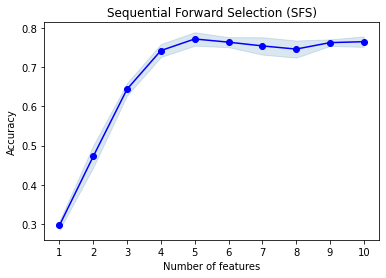

In [125]:
fig = plot_sequential_feature_selection(sfs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (SFS)')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()

**check feature columns in our dataset**

In [126]:
df.columns

Index(['state', 'account length', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn',
       'area_code_is_408', 'area_code_is_415', 'area_code_is_510',
       'international_plan_is_yes', 'voice_mail_plan_is_yes'],
      dtype='object')

## Selected Features Subset: DataFrame with Selected Features

In [130]:
df_subsets = df[['state',
 'number vmail messages',
 'total day calls',
 'total day charge',
 'total eve charge',
 'total night charge',
 'customer service calls',
 'area_code_is_408',
 'area_code_is_415',
 'voice_mail_plan_is_yes','churn']]

## Train-Test Split on Reduced Dataset

In [131]:
X_reduced = df_subsets.drop(['churn'],axis=1)
y_reduced = df_subsets['churn']

X_train_sfs,X_test_sfs,y_train_sfs,y_test_sfs = train_test_split(X_reduced,y_reduced,test_size=0.25,random_state=123)

## Random Forest Model with Selected Features Applied

In [132]:
rf_model_SFS_Applied = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
# Fitting the data into the algorithm
rf_model_SFS_Applied.fit(X_train_sfs,y_train_sfs)
# Getting the predictions
y_pred_rf_sfs = rf_model_SFS_Applied.predict(X_test_sfs) 

## SFS Applied Random Forest Model Results

SFS APPLIED RANDOM FOREST MODEL RESULTS
Accuracy:  0.96503
F1 score:  0.77477
Recall:  0.63235
Precision:  1.0


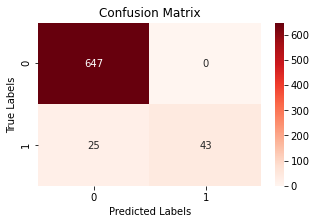

In [133]:
print("SFS APPLIED RANDOM FOREST MODEL RESULTS")
print('Accuracy: ',round(accuracy_score(y_test,y_pred_rf_sfs),5))
print('F1 score: ',round(f1_score(y_test,y_pred_rf_sfs),5))
print('Recall: ',round(recall_score(y_test,y_pred_rf_sfs),5))
print('Precision: ',round(precision_score(y_test,y_pred_rf_sfs),5))
cm_rf_sfs = confusion_matrix(y_test, y_pred_rf_sfs)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf_sfs, annot=True, cmap='Reds', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The high accuracy suggests that the model is able to correctly classify a large proportion of churn and non-churn cases. The F1 score provides a balanced measure of the model's accuracy, considering both precision (ability to correctly identify churn cases) and recall (ability to capture all churn cases). The F1 score of 0.77477 indicates a reasonably good balance between precision and recall.

The recall score of 0.63235 indicates that the model can capture 63.235% of the actual churn cases, while the precision score of 1.0 suggests that all the predicted churn cases are correct. This high precision indicates that when the model predicts a customer to churn, it is highly likely to be correct.

Overall, the SFS applied Random Forest model demonstrates strong performance in predicting customer churn with high accuracy and precision, while maintaining a reasonable balance between recall and F1 score.

## Top 10 Features by Importance

The bar plot below displays the top 10 features selected by the Sequential Forward Selection (SFS) applied Random Forest model. The importance of each feature is represented by the length of the bars. The higher the bar, the more important the feature is in predicting customer churn.

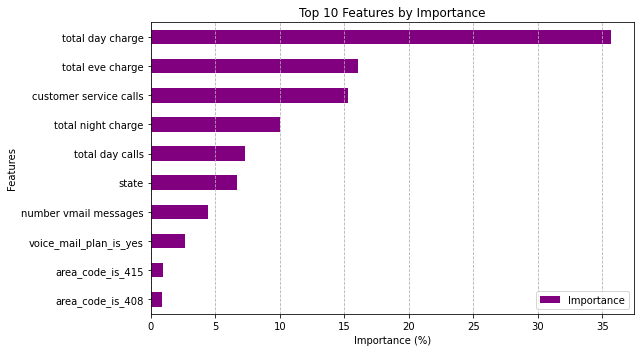

In [135]:
feature_importances = rf_model_SFS_Applied.feature_importances_
importance_df = pd.DataFrame({"Importance": feature_importances * 100}, index=X_train_sfs.columns)
importance_df = importance_df.sort_values(by="Importance", ascending=True)

top_10_features = importance_df.tail(10)
top_10_features.plot(kind="barh", color="purple", figsize=(9, 5))

plt.title("Top 10 Features by Importance")
plt.xlabel("Importance (%)")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--")
plt.tight_layout()
plt.show()

In [140]:
feature_importances = rf_model_SFS_Applied.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train_sfs.columns, "Importance": feature_importances * 100})
top_10_features = importance_df.nlargest(10, "Importance").sort_values(by="Importance", ascending=False)

print(top_10_features)


                  Feature  Importance
3        total day charge   35.655557
4        total eve charge   16.086103
6  customer service calls   15.321045
5      total night charge   10.018692
2         total day calls    7.299988
0                   state    6.718195
1   number vmail messages    4.432350
9  voice_mail_plan_is_yes    2.622387
8        area_code_is_415    0.978481
7        area_code_is_408    0.867202


## Findings

Based on the analysis using the Sequential Forward Selection (SFS) with a Random Forest model, the top 10 features that have the most significant impact on customer churn are as follows:

1. Total day charge: This feature has the highest importance, indicating that the charges incurred during daytime usage play a crucial role in determining customer churn.

2. Total eve charge: The charges for evening usage also have a significant impact on customer churn.

3. Customer service calls: The number of customer service calls made by customers is a strong indicator of potential churn.

4. Total night charge: Charges related to nighttime usage contribute to the likelihood of churn.

5. Total day calls: The number of calls made during the day affects customer churn.

6. State: The geographical location or state of the customer can influence churn behavior.

7. Number vmail messages: The presence or absence of a voicemail plan and the number of voicemail messages impact churn.

8. Voice_mail_plan_is_yes: Whether a customer has a voicemail plan or not affects churn behavior.

9. Area_code_is_415: The area code "415" has a slight impact on churn.

10. Area_code_is_408: The area code "408" also has a minor effect on churn.


# RECOMMENDATIONS 

Based on the findings, SyriaTel can take the following actions to reduce customer churn and minimize revenue loss:

1. Focus on managing and reducing the charges incurred by customers during daytime and evening usage. Analyze the pricing structure and consider offering competitive plans to retain customers.

2. Pay close attention to the number of customer service calls. Identify the root causes behind frequent calls and take proactive measures to address customer issues promptly.

3. Monitor and optimize the nighttime charges to ensure they are aligned with customer expectations and market standards.

4. Develop strategies to improve customer satisfaction and engagement during daytime usage, as indicated by the number of day calls.

5. Understand the specific factors related to each state and tailor marketing efforts and customer retention initiatives accordingly.

6. Evaluate the effectiveness of voicemail plans in retaining customers. Consider enhancing the features and benefits of these plans to increase customer loyalty.

7. Analyze the customer churn patterns associated with different area codes. Identify any specific issues or challenges faced by customers in those areas and develop targeted retention strategies.

8. Tailor marketing strategies: Utilize the information gained from the analysis to develop targeted marketing campaigns. By understanding the factors that contribute to customer churn, SyriaTel can tailor its marketing efforts to address customer needs and preferences more effectively.

9. Monitor customer satisfaction: Regularly assess customer satisfaction levels through surveys, feedback mechanisms, and customer interactions. Identify and address potential pain points or areas where customers might be dissatisfied to proactively prevent churn.

10. Leverage predictive models: Implement the tuned Random Forest model to predict customer churn in real-time. Continuously update and refine the model based on new data to improve its accuracy and effectiveness.

By implementing these recommendations, SyriaTel can reduce customer churn and mitigate the financial impact caused by customers who do not stay with the company for an extended period.

# CONCLUSION

In this analysis, we explored several machine learning models to predict customer churn in the telecommunications industry. We compared the performance of various models, including Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors, and Support Vector Machine (SVM), after tuning their hyperparameters. The evaluation metrics used to assess the models were accuracy, F1 score, recall, and precision.

Among the models examined, the Random Forest model (tuned)  outperformed other models in accurately predicting customer churn. 

Furthermore, by applying the Sequential Forward Selection (SFS) technique to the Random Forest model, we identified the top 10 features that significantly contribute to predicting customer churn.
